In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:

coffe_df = pd.read_excel('Coffee Shop Sales (1).xlsx')
coffe_df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [ ]:
coffe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [ ]:
coffe_df.shape

(149116, 11)

In [ ]:
coffe_df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


#Data Cleaning

In [ ]:
coffe_df.isnull().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


In [ ]:
coffe_df.duplicated().sum()

np.int64(0)

In [ ]:
# Make sure we are working on a copy of cleaned data
data_cleaned = coffe_df.copy()

# Convert object columns to strings
for col in data_cleaned.select_dtypes(include=['object']).columns:
    data_cleaned[col] = data_cleaned[col].astype(str)

# Remove leading/trailing spaces
for col in data_cleaned.select_dtypes(include=['object']).columns:
    data_cleaned[col] = data_cleaned[col].str.strip()


In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [ ]:
data_cleaned['transaction_time'] = pd.to_datetime(data_cleaned['transaction_time'])
data_cleaned.info()

/tmp/ipython-input-3235657735.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['transaction_time'] = pd.to_datetime(data_cleaned['transaction_time'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  datetime64[ns]
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.5+ MB


In [ ]:
#data_cleaned.to_excel('cleaned_data.xlsx', index=False)

#Profit/Loss *Analysis*

In [ ]:
# Calculate total sales
data_cleaned['total_sales'] = data_cleaned['transaction_qty'] * data_cleaned['unit_price']

# Estimate cost
cost_percentage = 0.6
data_cleaned['total_cost'] = data_cleaned['transaction_qty'] * (data_cleaned['unit_price'] * cost_percentage)

# Profit = Sales - Cost
data_cleaned['profit'] = data_cleaned['total_sales'] - data_cleaned['total_cost']


In [ ]:
product_summary = (
    data_cleaned.groupby('product_detail')
    .agg(total_sales=('total_sales', 'sum'),
         profit=('profit', 'sum'))
    .reset_index()
    .sort_values(by='profit', ascending=False)
)


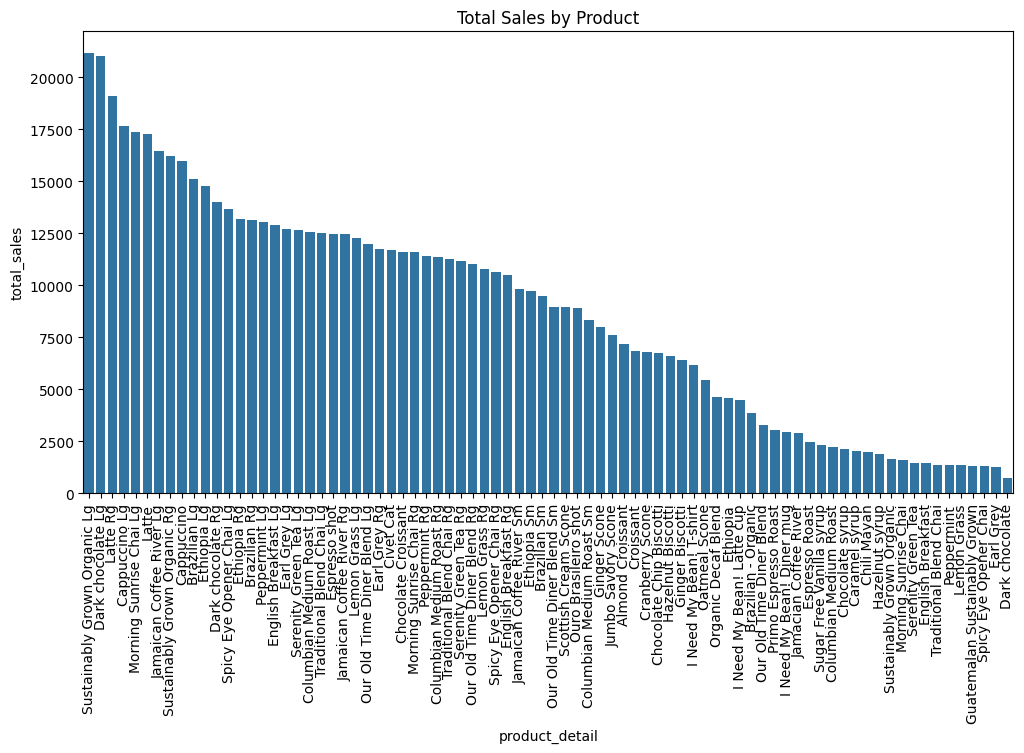

/tmp/ipython-input-1462403388.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_detail', y='profit', data=product_summary, palette='coolwarm')


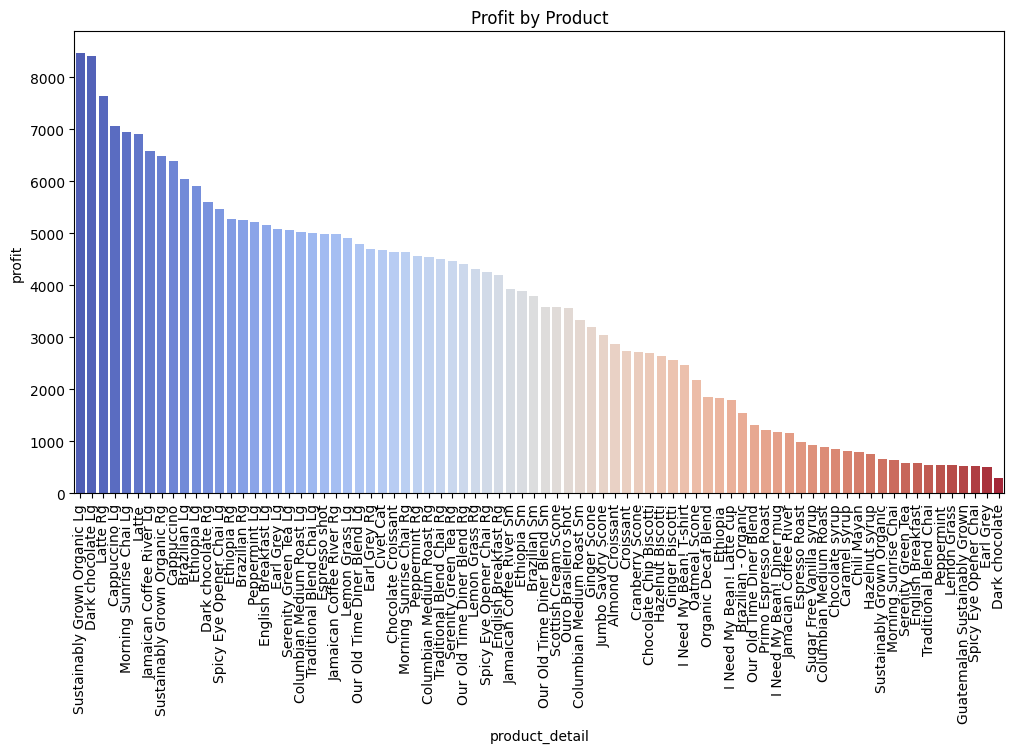

In [ ]:
# Total Sales
plt.figure(figsize=(12,6))
sns.barplot(x='product_detail', y='total_sales', data=product_summary)
plt.xticks(rotation=90)
plt.title("Total Sales by Product")
plt.show()

# Profit
plt.figure(figsize=(12,6))
sns.barplot(x='product_detail', y='profit', data=product_summary, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Profit by Product")
plt.show()


In [ ]:
# Profitable products
profitable_products = product_summary[product_summary['profit'] > 0]
print("Profitable Products:\n", profitable_products)

# Loss-making products
loss_products = product_summary[product_summary['profit'] <= 0]
print("Loss-Making Products:\n", loss_products)


Profitable Products:
                   product_detail  total_sales   profit
75  Sustainably Grown Organic Lg     21151.75  8460.70
20             Dark chocolate Lg     21006.00  8402.40
48                      Latte Rg     19112.25  7644.90
6                  Cappuccino Lg     17641.75  7056.70
53       Morning Sunrise Chai Lg     17384.00  6953.60
..                           ...          ...      ...
49                   Lemon Grass      1360.40   544.16
36  Guatemalan Sustainably Grown      1340.00   536.00
70         Spicy Eye Opener Chai      1335.90   534.36
22                     Earl Grey      1270.90   508.36
19                Dark chocolate       755.20   302.08

[80 rows x 3 columns]
Loss-Making Products:
 Empty DataFrame
Columns: [product_detail, total_sales, profit]
Index: []



#3.a Profit Increase Prediction (next 30 days)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


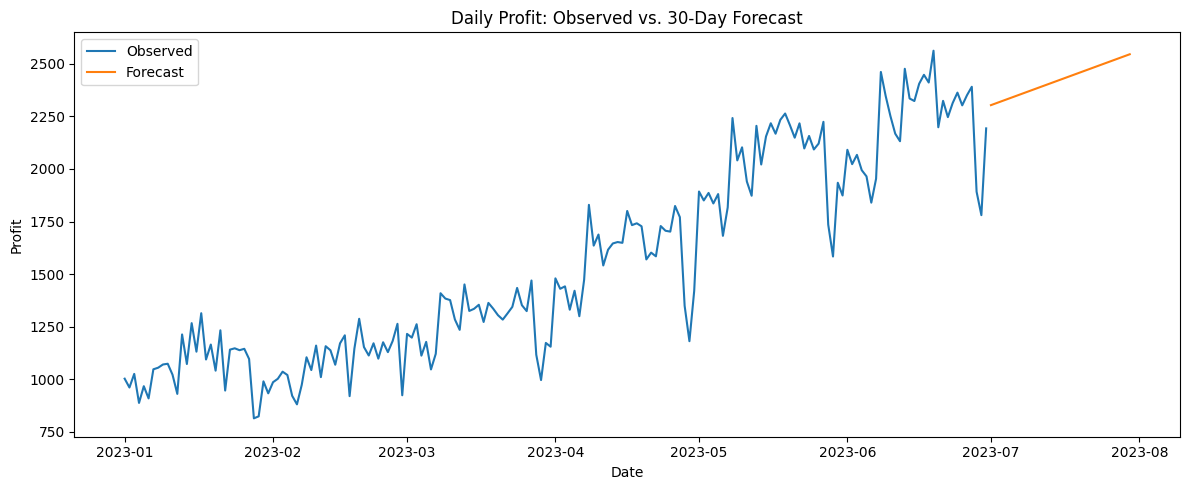

        date  predicted_profit
0 2023-07-01       2302.964600
1 2023-07-02       2311.301171
2 2023-07-03       2319.637742
3 2023-07-04       2327.974313
4 2023-07-05       2336.310884
5 2023-07-06       2344.647455
6 2023-07-07       2352.984026
7 2023-07-08       2361.320597
8 2023-07-09       2369.657168
9 2023-07-10       2377.993739


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 1) Ensure dates are proper datetimes
df = data_cleaned.copy()
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

# 2) Daily profit series
daily_profit = df.groupby('transaction_date')['profit'].sum().reset_index()

# 3) Simple time-index feature
daily_profit = daily_profit.sort_values('transaction_date')
daily_profit['day_num'] = (daily_profit['transaction_date'] - daily_profit['transaction_date'].min()).dt.days

X = daily_profit[['day_num']]
y = daily_profit['profit']


lr = LinearRegression()
lr.fit(X, y)


last_day_num = daily_profit['day_num'].max()
future_days = np.arange(last_day_num + 1, last_day_num + 31).reshape(-1, 1)
future_dates = pd.date_range(daily_profit['transaction_date'].max() + pd.Timedelta(days=1), periods=30, freq='D')
future_pred = lr.predict(future_days)

plt.figure(figsize=(12,5))
plt.plot(daily_profit['transaction_date'], daily_profit['profit'], label='Observed')
plt.plot(future_dates, future_pred, label='Forecast')
plt.title('Daily Profit: Observed vs. 30-Day Forecast')
plt.xlabel('Date'); plt.ylabel('Profit'); plt.legend(); plt.tight_layout(); plt.show()



#3C) Identify which products can increase profit

In [22]:
# (i) Profit trend by product (monthly), then slope
df = data_cleaned.copy()
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')
df['year_month'] = df['transaction_date'].dt.to_period('M').dt.to_timestamp()

# Monthly profit per product
pm = (df.groupby(['product_detail','year_month'])['profit']
        .sum().reset_index()
        .sort_values(['product_detail','year_month']))

# Compute slope of monthly profit vs time index for each product
def slope_for_product(g):
    g = g.sort_values('year_month').copy()
    g['t'] = (g['year_month'] - g['year_month'].min()).dt.days
    if g['t'].nunique() < 2:
        return 0.0
    coef = np.polyfit(g['t'], g['profit'], deg=1)  # [slope, intercept]
    return coef[0]

trend = pm.groupby('product_detail').apply(slope_for_product).reset_index(name='profit_trend_slope')

# (ii) Margin % and volume per product
prod_stats = df.groupby('product_detail').agg(
    sales=('total_sales','sum'),
    profit=('profit','sum'),
    qty=('transaction_qty','sum')
).reset_index()

prod_stats['margin_pct'] = np.where(prod_stats['sales']>0, prod_stats['profit']/prod_stats['sales'], 0.0)

# Combine & pick top opportunities:
#  - Positive/strong trend OR high margin% with room to scale (not already huge qty)
combined = prod_stats.merge(trend, on='product_detail', how='left')

# Tune thresholds as you like:
top_trend = combined.sort_values('profit_trend_slope', ascending=False).head(10)
top_margin_opps = (combined[combined['qty'] <= combined['qty'].median()]
                   .sort_values('margin_pct', ascending=False)
                   .head(10))

print("\nTop 10 products by positive profit trend (scale these):")
print(top_trend[['product_detail','profit_trend_slope','profit','margin_pct','qty']])

print("\nTop 10 high-margin products with room to scale (push these):")
print(top_margin_opps[['product_detail','margin_pct','profit','sales','qty']])



Top 10 products by positive profit trend (scale these):
                  product_detail  profit_trend_slope  profit  margin_pct   qty
75  Sustainably Grown Organic Lg            8.200180  8460.7         0.4  4453
20             Dark chocolate Lg            7.772133  8402.4         0.4  4668
53       Morning Sunrise Chai Lg            7.258466  6953.6         0.4  4346
48                      Latte Rg            7.213031  7644.9         0.4  4497
6                  Cappuccino Lg            6.743004  7056.7         0.4  4151
47                         Latte            6.419780  6903.0         0.4  4602
5                     Cappuccino            6.261948  6399.0         0.4  4266
43      Jamaican Coffee River Lg            6.171955  6592.5         0.4  4395
31                   Ethiopia Lg            5.945622  5917.8         0.4  4227
76  Sustainably Grown Organic Rg            5.805543  6493.5         0.4  4329

Top 10 high-margin products with room to scale (push these):
            

/tmp/ipython-input-2860700590.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trend = pm.groupby('product_detail').apply(slope_for_product).reset_index(name='profit_trend_slope')


#3B) Explore factors contributing to profitability

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

df = data_cleaned.copy()

# Time features
df['transaction_time'] = pd.to_datetime(df['transaction_time'], errors='coerce')
df['hour'] = df['transaction_time'].dt.hour
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')
df['dow'] = df['transaction_date'].dt.dayofweek   # 0=Mon .. 6=Sun
df['month'] = df['transaction_date'].dt.month

# Target (per-transaction profit already created earlier)
y = df['profit'].values

# Candidate features (mix of numeric + categorical)
num_feats = ['transaction_qty', 'unit_price', 'hour', 'dow', 'month']
cat_feats = ['store_location', 'product_category', 'product_type']

X = df[num_feats + cat_feats]

# Preprocess + model
pre = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feats),
    ('num', 'passthrough', num_feats)
])

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    max_depth=None,
    n_jobs=-1
)

pipe = Pipeline([
    ('pre', pre),
    ('model', rf)
])

pipe.fit(X, y)

# Get importances back to readable labels
ohe = pipe.named_steps['pre'].named_transformers_['cat']
cat_feature_names = list(ohe.get_feature_names_out(cat_feats))
feature_names = cat_feature_names + num_feats

importances = pipe.named_steps['model'].feature_importances_
feat_imp = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)

print("Top drivers of profit:")
print(feat_imp.head(15))


Top drivers of profit:
                                feature  importance
41                      transaction_qty    0.579953
42                           unit_price    0.403163
8             product_category_Flavours    0.016399
31              product_type_Housewares    0.000102
4              product_category_Branded    0.000093
21      product_type_Drinking Chocolate    0.000050
16         product_type_Brewed Chai tea    0.000042
43                                 hour    0.000034
11                 product_category_Tea    0.000032
6         product_category_Coffee beans    0.000027
36           product_type_Premium Beans    0.000013
29           product_type_Hot chocolate    0.000011
45                                month    0.000009
7   product_category_Drinking Chocolate    0.000009
9            product_category_Loose Tea    0.000008
Top drivers of profit:
                                feature  importance
41                      transaction_qty    0.579953
42                

#3D) Recommendations to increase profit margin
Optimize Pricing

Since unit_price is the 2nd largest profit driver, test small price adjustments on high-demand products (e.g., Latte, Cappuccino).

Increase Sales Volume of High-Margin Products

Promote syrups (Chocolate, Hazelnut, Sugar-Free Vanilla) as add-ons.

Encourage staff upselling with “custom flavor” promotions.

Focus Marketing on Trend-Positive Products

Highlight Sustainably Grown Organic and Dark Chocolate Lg in seasonal promotions (they’re already growing).

Bundle Strategy

Pair low-volume high-margin items (Chili Mayan, Oatmeal Scone) with popular coffee drinks.

Inventory Planning

Ensure consistent stock for high-margin syrups and growing coffees — avoid stockouts.

In [23]:

df = data_cleaned.copy()

# Assumes you already created these in Step 2:
# df['total_sales'] = df['transaction_qty'] * df['unit_price']
# df['total_cost']  = df['transaction_qty'] * (df['unit_price'] * 0.60)
# df['profit']      = df['total_sales'] - df['total_cost']

prod = (df.groupby('product_detail')
          .agg(sales=('total_sales','sum'),
               cost=('total_cost','sum'),
               profit=('profit','sum'),
               qty=('transaction_qty','sum'),
               avg_price=('unit_price','mean'))
          .reset_index())

prod['margin_pct'] = np.where(prod['sales']>0, prod['profit']/prod['sales'], 0.0)

# True loss-makers
loss_products = prod[prod['profit'] < 0].sort_values('profit')
print("Loss-making products (if any):")
print(loss_products[['product_detail','profit','margin_pct','qty','sales']].head(20))

# If none are < 0, define “at-risk” by weak economics or momentum:
at_risk = prod[
    (prod['margin_pct'] < prod['margin_pct'].quantile(0.25)) |   # weak margins
    (prod['profit'] < prod['profit'].quantile(0.25))              # low absolute profit
].copy()


Loss-making products (if any):
Empty DataFrame
Columns: [product_detail, profit, margin_pct, qty, sales]
Index: []


In [24]:
#4B) Diagnose why those products are losing/at-risk
 #(i) & (ii) already in prod: margin_pct, qty

# (iii) Price position vs category peers
cat_price = (df.groupby(['product_category','product_detail'])
               .agg(price=('unit_price','mean'))
               .reset_index())
cat_stats = (cat_price.groupby('product_category')
              .agg(cat_price_mean=('price','mean'),
                   cat_price_std=('price','std'))
              .reset_index())
cat_price = cat_price.merge(cat_stats, on='product_category', how='left')
cat_price['price_z'] = (cat_price['price'] - cat_price['cat_price_mean'])/cat_price['cat_price_std']

price_pos = cat_price[['product_detail','price_z']]

# (iv) Profit momentum (monthly slope)
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')
df['year_month'] = df['transaction_date'].dt.to_period('M').dt.to_timestamp()
pm = (df.groupby(['product_detail','year_month'])['profit']
        .sum().reset_index()
        .sort_values(['product_detail','year_month']))

def slope_for_product(g):
    g = g.sort_values('year_month').copy()
    g['t'] = (g['year_month'] - g['year_month'].min()).dt.days
    if g['t'].nunique() < 2:
        return 0.0
    coef = np.polyfit(g['t'], g['profit'], deg=1)  # slope
    return float(coef[0])

trend = pm.groupby('product_detail', as_index=False).apply(
    slope_for_product, include_groups=False
).rename(columns={None:'profit_trend_slope'})

# Combine diagnostics for loss/at-risk set
diag = (prod.merge(price_pos, on='product_detail', how='left')
            .merge(trend, on='product_detail', how='left'))

focus = pd.concat([
    loss_products[['product_detail','sales','profit','margin_pct','qty']].assign(flag='loss'),
    at_risk[['product_detail','sales','profit','margin_pct','qty']].assign(flag='at_risk')
], ignore_index=True).drop_duplicates('product_detail')

focus = (focus.merge(diag[['product_detail','price_z','profit_trend_slope']], on='product_detail', how='left')
              .sort_values(['flag','profit']))
print("Diagnostics for loss/at-risk products:")
print(focus.head(30))


Diagnostics for loss/at-risk products:
                  product_detail     sales    profit  margin_pct   qty  \
8                 Dark chocolate    755.20   302.080         0.4   118   
10                     Earl Grey   1270.90   508.360         0.4   142   
25         Spicy Eye Opener Chai   1335.90   534.360         0.4   122   
15  Guatemalan Sustainably Grown   1340.00   536.000         0.4   134   
21                   Lemon Grass   1360.40   544.160         0.4   152   
23                    Peppermint   1369.35   547.740         0.4   153   
29        Traditional Blend Chai   1369.35   547.740         0.4   153   
11             English Breakfast   1440.95   576.380         0.4   161   
24            Serenity Green Tea   1470.75   588.300         0.4   159   
22          Morning Sunrise Chai   1596.00   638.400         0.4   168   
27     Sustainably Grown Organic   1679.60   671.840         0.4   221   
16                Hazelnut syrup   1897.60   759.040         0.4  2372   

In [25]:
def recommend(row):
    recs = []
    # Margin issues
    if row['margin_pct'] < 0.25:
        recs += ["Renegotiate COGS / recipe cost",
                 "Test +3–5% price increase (watch volume)"]
    # Volume issues
    if row['qty'] < prod['qty'].median():
        recs += ["Menu placement & signage refresh",
                 "Bundle with top sellers (Latte/Cappuccino)",
                 "Time-bound promo in peak hours"]
    # Price position vs peers
    if pd.notnull(row['price_z']):
        if row['price_z'] > 0.8:
            recs += ["Consider micro price drop or value add (bundle)"]
        elif row['price_z'] < -0.8:
            recs += ["Consider small price lift to align with peers"]
    # Momentum
    if pd.notnull(row['profit_trend_slope']) and row['profit_trend_slope'] < 0:
        recs += ["Run A/B promo to arrest negative trend",
                 "Audit store-level execution (availability/stockouts)"]
    # If truly loss-making
    if row.get('flag') == 'loss':
        recs += ["Short-term salvage campaign; if still negative, discontinue/reformulate"]
    return "; ".join(dict.fromkeys(recs)) or "Maintain; monitor quarterly"

actions = focus.copy()
actions['recommendations'] = actions.apply(recommend, axis=1)
actions = actions[['product_detail','flag','profit','margin_pct','qty','price_z','profit_trend_slope','recommendations']]
print("Loss mitigation playbook:")
print(actions.head(20))

# Optional: save
# actions.to_excel("Loss_Mitigation_Playbook.xlsx", index=False)


Loss mitigation playbook:
                  product_detail     flag    profit  margin_pct   qty  \
8                 Dark chocolate  at_risk   302.080         0.4   118   
10                     Earl Grey  at_risk   508.360         0.4   142   
25         Spicy Eye Opener Chai  at_risk   534.360         0.4   122   
15  Guatemalan Sustainably Grown  at_risk   536.000         0.4   134   
21                   Lemon Grass  at_risk   544.160         0.4   152   
23                    Peppermint  at_risk   547.740         0.4   153   
29        Traditional Blend Chai  at_risk   547.740         0.4   153   
11             English Breakfast  at_risk   576.380         0.4   161   
24            Serenity Green Tea  at_risk   588.300         0.4   159   
22          Morning Sunrise Chai  at_risk   638.400         0.4   168   
27     Sustainably Grown Organic  at_risk   671.840         0.4   221   
16                Hazelnut syrup  at_risk   759.040         0.4  2372   
3                    Chil